### Route scoring tutorial

This shows how to use route scoring model described in this paper:

[Yujia G, Kabeshov M, Le THD, Genheden S, Bergonzini G, Engkvist O, et al. A Deep Learning with Expert Augmentation Approach for Route Scoring in Organic Synthesis. ChemRxiv. 2024; doi:10.26434/chemrxiv-2024-tp7rh](http://doi.org/10.26434/chemrxiv-2024-tp7rh)

In [1]:
import json

import pandas as pd

from rxnutils.chem.features.sc_score import SCScore
from rxnutils.routes.deepset.scoring import DeepsetModelClient, deepset_route_score
from rxnutils.routes.base import SynthesisRoute

Download model artifacts from Zenodo

In [8]:
!wget https://zenodo.org/records/14533779/files/deepset_route_scoring_sdf.onnx?download=1 -O deepset_route_scoring_sdf.onnx
!wget https://zenodo.org/records/14533779/files/reaction_class_ranks.csv?download=1 -O reaction_class_ranks.csv
!wget https://zenodo.org/records/14533779/files/scscore_model_1024_bits.onnx?download=1 -O scscore_model_1024_bits.onnx

--2024-12-20 08:15:49--  https://zenodo.org/records/14533779/files/deepset_route_scoring_sdf.onnx?download=1
Resolving seprivatezen.astrazeneca.net (seprivatezen.astrazeneca.net)... 194.34.82.228
Connecting to seprivatezen.astrazeneca.net (seprivatezen.astrazeneca.net)|194.34.82.228|:9480... connected.
Proxy request sent, awaiting response... 200 OK
Length: 23438322 (22M) [application/octet-stream]
Saving to: ‘deepset_route_scoring_sdf.onnx’

deepset_route_scori 100%[===================>]  22.35M   415KB/s    in 68s     

2024-12-20 08:16:58 (339 KB/s) - ‘deepset_route_scoring_sdf.onnx’ saved [23438322/23438322]

--2024-12-20 08:16:58--  https://zenodo.org/records/14533779/files/reaction_class_ranks.csv?download=1
Resolving seprivatezen.astrazeneca.net (seprivatezen.astrazeneca.net)... 194.34.82.228
Connecting to seprivatezen.astrazeneca.net (seprivatezen.astrazeneca.net)|194.34.82.228|:9480... connected.
Proxy request sent, awaiting response... 200 OK
Length: 86474 (84K) [text/plain]


Will read example routes from disc

In [9]:
dicts = json.load(open("example-routes.json", "r"))
routes = [SynthesisRoute(dict_) for dict_ in dicts]


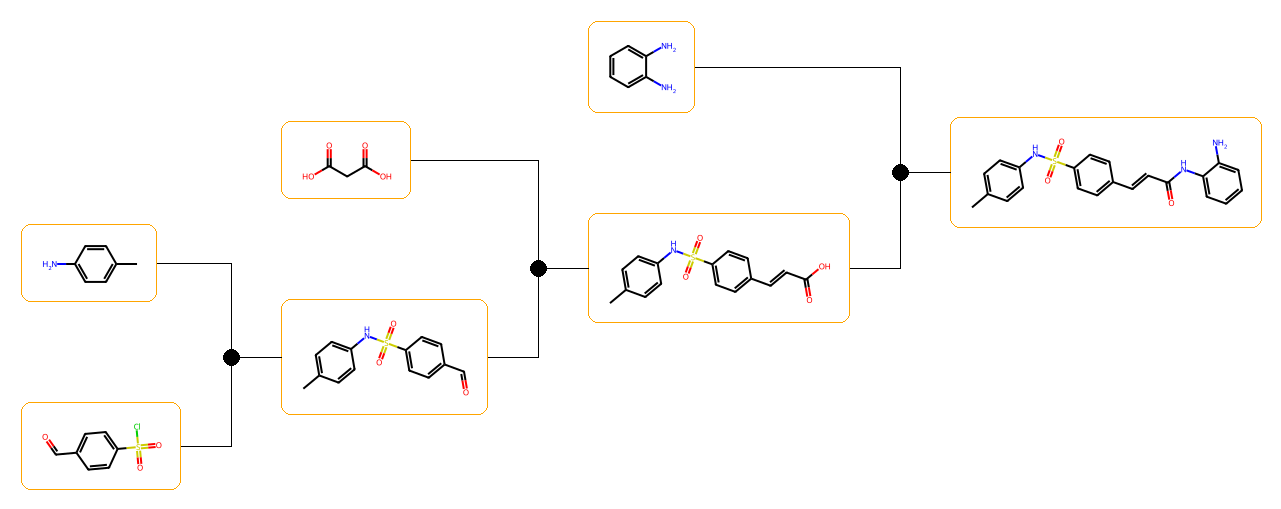

In [10]:
routes[0].image()

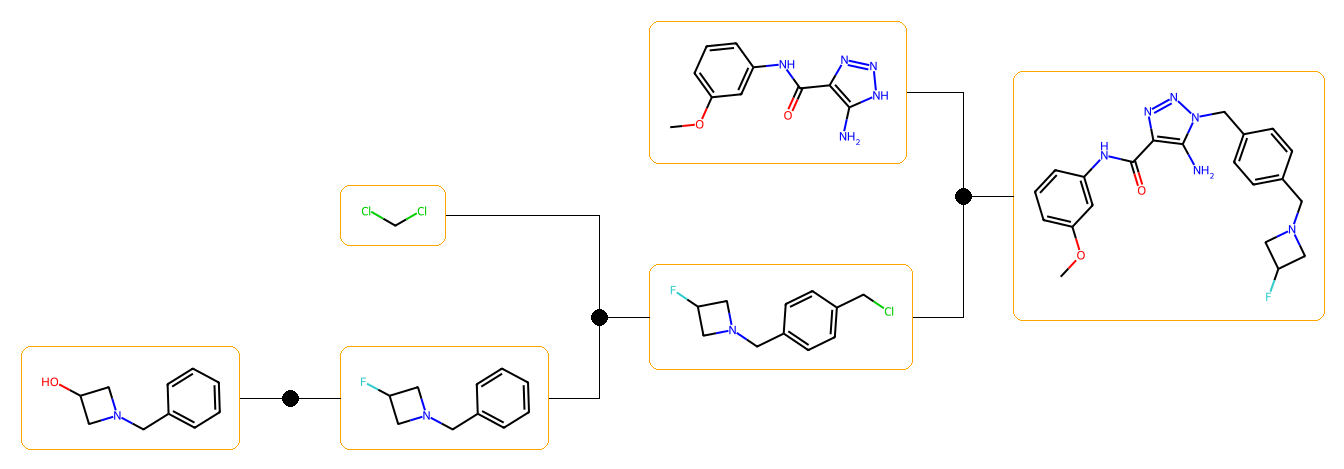

In [11]:
routes[1].image()

Setup classes for scoring component

In [12]:
# Setup class ranks
df = pd.read_csv("reaction_class_ranks.csv", sep = ",")
reaction_class_ranks = dict(zip(df["reaction_class"], df["rank_score"]))
# Setup SCScore model
scscorer = SCScore("scscore_model_1024_bits.onnx")
# Setup the Deepset model client
deepset_client = DeepsetModelClient("deepset_route_scoring_sdf.onnx")

Score the routes

In [13]:
deepset_route_score(routes[0], deepset_client, scscorer, reaction_class_ranks)

0.10651183128356934

In [14]:
deepset_route_score(routes[1], deepset_client, scscorer, reaction_class_ranks)

7.977269172668457